# Carga de Datos y Librerías
En esta sección, importo las librerías esenciales para la manipulación y visualización de datos.
* **Pandas y Numpy:** Para el manejo de estructuras de datos y cálculos.
* **Matplotlib y Seaborn:** Para el análisis gráfico.

El dataset utilizado es "Superstore Sales", que contiene información transaccional de un retail global. Cargo los datos desde Google Drive para asegurar la persistencia.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cvs/train.csv')
df_copy = df.copy()
df_copy.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

## 🔍 Inspección Visual Interactiva
Para facilitar una exploración ágil de los datos sin escribir consultas repetitivas, habilito la extensión `data_table` de Google Colab.

Esto convierte los DataFrames estáticos en **tablas interactivas** que permiten:
* **Filtrar** registros rápidamente.
* **Ordenar** columnas de forma ascendente/descendente.
* **Paginar** para ver más allá de las primeras filas.

Es una herramienta clave para validar visualmente la limpieza de datos antes de comenzar el análisis estadístico.

In [ ]:
from google.colab import data_table
# Activa la visualización interactiva
data_table.enable_dataframe_formatter()
# Dataframe
df_copy

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9795    SH-19975     Sally Hughsby  Corporate  United States          Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   

           State  Postal Code   Region       Product ID         Category  \
0       Kentucky      42420.0    South  FUR-BO-10001798        Furniture   
1       Kentucky      42420.0    South  FUR-CH-10000454        Furniture   
2     California      90036.0     West  OFF-LA-10000240  Office Supplies   
3        Florida      33311.0    South  FUR-TA-10000577        Furniture   
4        Florida      33311.0    South  OFF-ST-10000760  Office Supplies   
...          ...          ...      ...              ...              ...   
9795    Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796        Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797        Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798        Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799        Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name     Sales  
0       Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2          Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3          Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4         Storage                     Eldon Fold 'N Roll Cart System   22.3680  
...           ...                                                ...       ...  
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980  
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   10.3680  
9797       Phones                                        GE 30524EE4  235.1880  
9798       Phones           Anker 24W Portable Micro USB Car Charger   26.3760  
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.3840  

[9800 rows x 18 columns]

# Limpieza y Calidad de Datos (Data Cleaning)
La calidad de los datos es fundamental para obtener insights correctos.

He creado una función personalizada `eliminar_duplicados_nulos` para automatizar:
* **Detección y eliminación de duplicados:** Para evitar conteos dobles de ventas.
* **Manejo de valores nulos:** Para asegurar que no trabajamos con registros incompletos que puedan romper el análisis.


In [ ]:
def eliminar_duplicados_nulos(df_edn):

  print(f"Filas antes de limpieza: {df_edn.shape[0]}")

  # DUPLICADOS
  duplicados = df_edn.duplicated(keep='first').sum()
  print(f"Duplicados encontrados: {duplicados}")

  df_edn = df_edn.drop_duplicates(keep='first').copy()
  print(f"Filas después de eliminar duplicados: {len(df_edn)}")

  # NULOS
  # Solo contamos nulos en columnas críticas para saber cuántos vamos a borrar
  # Ejemplo: no nos importa si falta el Postal Code
  columnas_criticas = ['Order ID', 'Order Date', 'Customer ID', 'Sales', 'Product ID']
  nulos_criticos = df_edn[columnas_criticas].isnull().any(axis=1).sum()
  print(f"Filas con datos críticos faltantes: {nulos_criticos}")

  # Solo borramos si falta información en las columnas CRÍTICAS
  df_edn = df_edn.dropna(subset=columnas_criticas).copy()

  print(f"Filas después de eliminar nulos críticos: {len(df_edn)}")

  print("\n*** VERIFICACIÓN FINAL DE LIMPIEZA ***")
  print(f"Total de filas limpias: {df_edn.shape[0]}")

  return df_edn



In [ ]:
df_copy = eliminar_duplicados_nulos(df_copy)

Filas antes de limpieza: 9800
Duplicados encontrados: 0
Filas después de eliminar duplicados: 9800
Filas con datos críticos faltantes: 0
Filas después de eliminar nulos críticos: 9800

*** VERIFICACIÓN FINAL DE LIMPIEZA ***
Total de filas limpias: 9800


# Estandarización y Transformación de Tipos

Al cargar el CSV, pandas suele inferir los tipos de datos de forma genérica. Para optimizar el uso de memoria y facilitar el análisis temporal, realizo las siguientes conversiones explícitas:

* **Fechas:** Convierto `Order Date` y `Ship Date` a formato `datetime` para poder extraer meses, años y días.
* **Categorías y Texto:** Utilizo el tipo `string[pyarrow]` para un manejo más eficiente de textos.
* **Códigos Postales:** Se aseguran como enteros para evitar decimales innecesarios.

In [ ]:
columnas_string = ['Order ID','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Region','Product ID','Category','Sub-Category','Product Name']
columnas_fechas = ['Order Date','Ship Date']
columnas_int = ['Postal Code']

df_copy[columnas_int] = df_copy[columnas_int].fillna(0).astype(int)
df_copy[columnas_fechas] = df_copy[columnas_fechas].apply(lambda col: pd.to_datetime(col, format='%d/%m/%Y', errors='coerce'))
df_copy[columnas_string] = df_copy[columnas_string].astype('string[pyarrow]')


In [ ]:
df_copy.info()
df_copy.head()
df_copy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   string        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   string        
 5   Customer ID    9800 non-null   string        
 6   Customer Name  9800 non-null   string        
 7   Segment        9800 non-null   string        
 8   Country        9800 non-null   string        
 9   City           9800 non-null   string        
 10  State          9800 non-null   string        
 11  Postal Code    9800 non-null   int64         
 12  Region         9800 non-null   string        
 13  Product ID     9800 non-null   string        
 14  Category       9800 non-null   string        
 15  Sub-Category   9800 n

Row ID                     Order Date  \
count  9800.000000                           9800   
mean   4900.500000  2017-05-01 05:13:51.673469440   
min       1.000000            2015-01-03 00:00:00   
25%    2450.750000            2016-05-24 00:00:00   
50%    4900.500000            2017-06-26 00:00:00   
75%    7350.250000            2018-05-15 00:00:00   
max    9800.000000            2018-12-30 00:00:00   
std    2829.160653                            NaN   

                           Ship Date   Postal Code         Sales  
count                           9800   9800.000000   9800.000000  
mean   2017-05-05 04:17:52.653061120  55211.280918    230.769059  
min              2015-01-07 00:00:00      0.000000      0.444000  
25%              2016-05-27 18:00:00  23223.000000     17.248000  
50%              2017-06-29 00:00:00  57551.000000     54.490000  
75%              2018-05-19 00:00:00  90008.000000    210.605000  
max              2019-01-05 00:00:00  99301.000000  22638.480000  
std                              NaN  32076.677954    626.651875

## 📊 Detección de Outliers y Distribución

Para entender la naturaleza de las ventas (y detectar posibles anomalías), utilizaré el **Rango Intercuartílico (IQR)** y visualizaciones de **Boxplot**. A continuación, explico brevemente los conceptos estadísticos aplicados:

### 1. Cuartiles (Q1, Q2, Q3)
Los cuartiles son valores que dividen nuestros datos ordenados en cuatro partes iguales (25% cada una).
* **Q1 (Primer Cuartil - 25%):** El valor debajo del cual se encuentra el 25% de las ventas más bajas.
* **Q2 (Mediana - 50%):** El valor exacto en el medio del conjunto de datos.
* **Q3 (Tercer Cuartil - 75%):** El valor debajo del cual se encuentra el 75% de los datos.
* El 25% restante son las ventas más altas.

### 2. Rango Intercuartílico (IQR)
Es la distancia entre el Q3 y el Q1 (**IQR = Q3 - Q1**).
* Representa al **50% central** de nuestros datos.
* Aquí es donde se concentra el comportamiento "normal" o habitual de las ventas del negocio.

### 3. Boxplot (Diagrama de Caja)
Es la herramienta visual:
* **La Caja:** Representa el IQR (el 50% central de las ventas).
* **La Línea dentro de la caja:** Es la Mediana (Q2).
* **Los "Bigotes":** Se extienden hasta 1.5 veces el IQR. Todo lo que esté dentro de los bigotes se considera estadísticamente normal.
* **Los Puntos fuera de los bigotes:** Son los **Outliers** (Valores atípicos).

In [ ]:
def analizar_distribucion_outliers(df, columna):
  # --- 1. CÁLCULOS MATEMÁTICOS ---
  Q1 = df[columna].quantile(0.25)
  Q2 = df[columna].quantile(0.50) # Mediana
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1

  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

  # --- 2. REPORTING ---
  print(f"--- Análisis de {columna} ---")
  print(f"Rango Intercuartílico (IQR): {IQR:.2f}")
  print(f"Límite inferior permitido: {limite_inferior:.2f}")
  print(f"Límite superior permitido: {limite_superior:.2f}")
  print(f"Cantidad de outliers detectados: {outliers.shape[0]}")
  print("-" * 30)

  # --- 3. VISUALIZACIÓN ---
  plt.figure(figsize=(12, 3))

  sns.boxplot(x=df[columna], color='skyblue')
  plt.xlim(0, 1000)

  # Detalle Q
  plt.axvline(Q1, color='blue', linestyle='--', label=f"Q1: {Q1:.2f}")
  plt.axvline(Q2, color='green', linestyle='-', linewidth=2, label=f"Mediana: {Q2:.2f}")
  plt.axvline(Q3, color='red', linestyle='--', label=f"Q3: {Q3:.2f}")

  # Truco para que el IQR salga en la leyenda
  plt.axvline(Q3, color='purple', linestyle='', label=f"IQR: {IQR:.2f}")

  plt.title(f'Distribución de {columna}')
  plt.legend(loc='upper right')
  plt.show()

  return outliers




--- Análisis de Sales ---
Rango Intercuartílico (IQR): 193.36
Límite inferior permitido: -272.79
Límite superior permitido: 500.64
Cantidad de outliers detectados: 1145
------------------------------


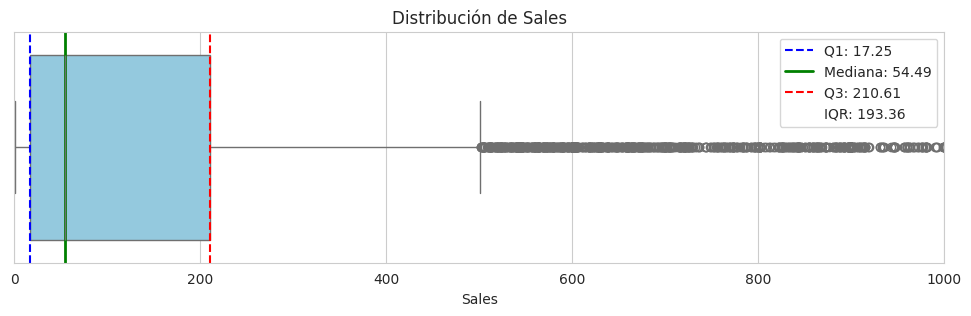

In [ ]:
# Análisis Ventas
outliers_sales = analizar_distribucion_outliers(df, 'Sales')


**Análisis distribución outliers de Sales**

El análisis de distribución muestra una fuerte asimetría positiva. Mientras que la mediana es baja, exiten una cola larga hacia valores elevados. Esto indica que el negocio se sostiene por un alto volumen de ventas pequeñas, presentando ventas esporádicas con valores altos.

Los outliers detectados no fueron eliminados, ya que representan transacciones reales de alto valor, relevantes para el análisis del negocio.

## Definición de Métricas Clave (KPIs)

Para evaluar el negocio de manera rápida, comenzamos calculando los **KPIs (Key Performance Indicators)**. Estos son valores numéricos fundamentales que resumen el rendimiento global antes de entrar en desgloses detallados.

En este proyecto evaluaremos:
* **Ingresos Totales (total_ventas):** El volumen bruto de dinero generado.
* **Volumen de Transacciones (total_ordenes):** La cantidad de pedidos únicos procesados.
* **Ticket Promedio (avg_ticket):** Cálculo de cuánto gasta, en promedio, un cliente en cada compra.

In [ ]:
total_ventas = df_copy['Sales'].sum()
total_ordenes = df_copy['Order ID'].nunique()
avg_ticket = total_ventas / total_ordenes

print("--- KPIs ---")
print(f"Ventas Totales: ${total_ventas:,.2f}")
print(f"Total de Órdenes: {total_ordenes}")
print(f"Ticket Promedio: ${avg_ticket:,.2f}")

--- KPIs ---
Ventas Totales: $2,261,536.78
Total de Órdenes: 4922
Ticket Promedio: $459.48


## 📊 Análisis Exploratorio de Datos (EDA)

El **EDA (Exploratory Data Analysis)** es la fase de "investigación" del proyecto. Dejamos de mirar el número global y utilizamos visualizaciones para entender **cómo, cuándo y dónde** ocurren los eventos a analizar.

El objetivo no es solo hacer gráficos, sino responder preguntas de negocio específicas:
* **Dimensión Temporal:** ¿El negocio crece o decrece? ¿Hay estacionalidad (meses con picos de venta)?
* **Dimensión Producto:** ¿Qué categorías sostienen el negocio? (Principio de Pareto: a veces pocos productos generan la mayoría de las ventas).
* **Dimensión Geográfica:** ¿En qué regiones la empresa es más fuertes y en cuáles débiles?

In [ ]:
# Configuración estética
sns.set_style("whitegrid")

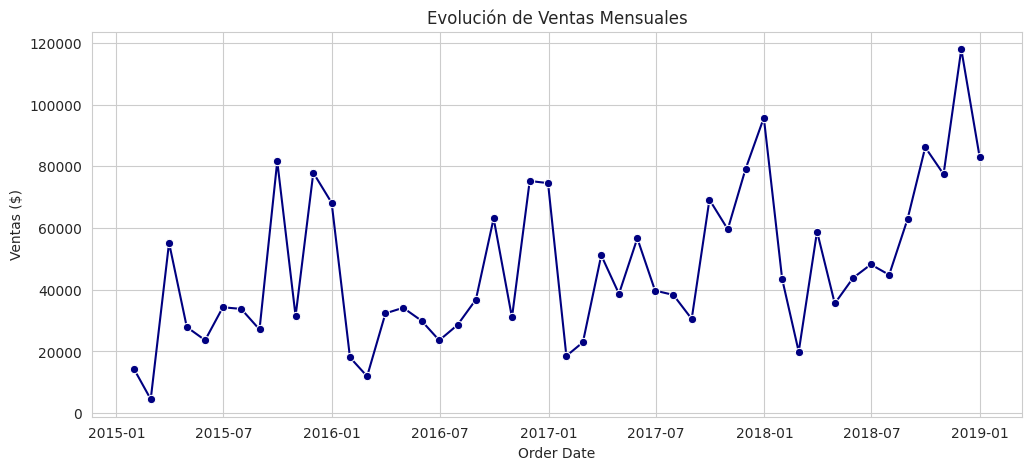

In [ ]:
# --- GRÁFICO: Ventas Mensuales ---
ventas_mensuales = df_copy.set_index('Order Date').resample('ME')['Sales'].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(data=ventas_mensuales, marker='o', color='navy')
plt.title('Evolución de Ventas Mensuales')
plt.ylabel('Ventas ($)')
plt.show()

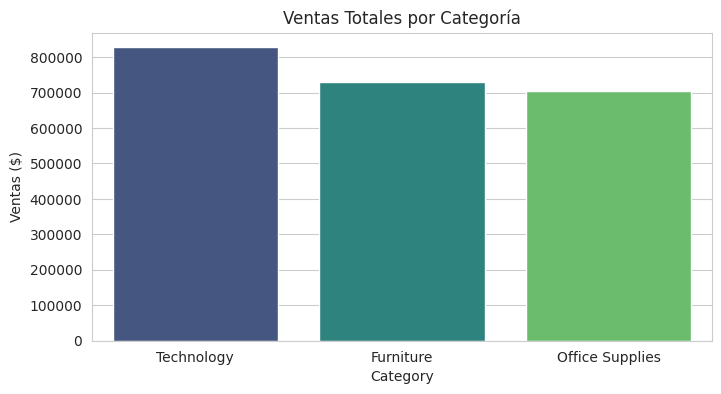

In [ ]:
# --- GRÁFICO: Ventas por Categoría ---
ventas_categoria = df_copy.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(
    x=ventas_categoria.index,
    y=ventas_categoria.values,
    hue=ventas_categoria.index,
    palette='viridis',
    legend=False
)
plt.title('Ventas Totales por Categoría')
plt.ylabel('Ventas ($)')
plt.show()

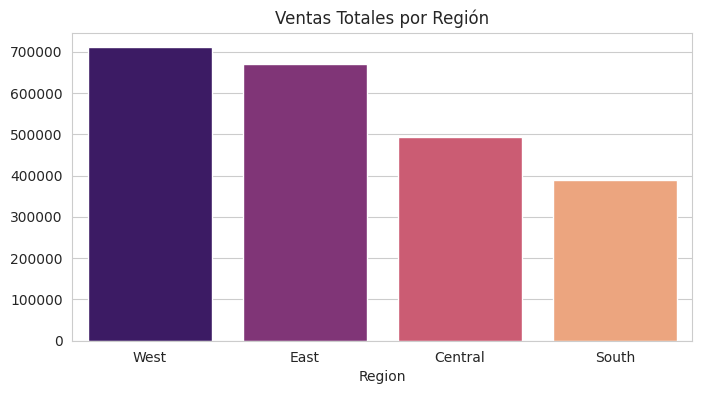

In [ ]:
# --- GRÁFICO 3: Ventas por Región ---
ventas_region = df_copy.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(
    x=ventas_region.index,
    y=ventas_region.values,
    hue=ventas_region.index,
    palette='magma',
    legend=False
)
plt.title('Ventas Totales por Región')
plt.show()

## 💾 Consultas SQL (Integración Python + SQL)

Para simular un entorno de trabajo real donde los datos residen en bases de datos relacionales, utilizo la librería `sqlite3`.

**Flujo de trabajo:**
* Creo una base de datos temporal en memoria (RAM).
* Cargo el DataFrame limpio como una tabla SQL llamada `superstore`.
* Ejecuto consultas SQL estándar (`SELECT`, `GROUP BY`) para validar los KPIs obtenidos con Python.

In [ ]:
# 1. Crear conexión a una base de datos temporal en memoria
conn = sqlite3.connect(':memory:')

# 2. Convertir el DataFrame a tabla SQL
# 'superstore' será el nombre de la tabla en SQL
df_copy.to_sql('superstore', conn, index=False, if_exists='replace')

print("Base de datos SQL creada en memoria y tabla cargada exitosamente.")

# Función auxiliar para ejecutar queries y ver el resultado limpio
def sql_query(query):
    return pd.read_sql_query(query, conn)

Base de datos SQL creada en memoria y tabla cargada exitosamente.


In [ ]:
# --- CONSULTA: Ventas Totales por Categoría ---
query_categoria = """
SELECT
    Category,
    SUM(Sales) as Total_Ventas
FROM superstore
GROUP BY Category
ORDER BY Total_Ventas DESC;
"""
print("Resultado SQL - Ventas por Categoría:")
display(sql_query(query_categoria))

Resultado SQL - Ventas por Categoría:


Category  Total_Ventas
0       Technology   827455.8730
1        Furniture   728658.5757
2  Office Supplies   705422.3340

In [ ]:
# --- CONSULTA: Top 5 Productos más vendidos ---
query_top_products = """
SELECT
    "Product Name",
    ROUND(SUM(Sales), 2) as Total_Ventas,
    COUNT("Product ID") as Cantidad_Unidades
FROM superstore
GROUP BY "Product Name"
ORDER BY Total_Ventas DESC
LIMIT 5;
"""
print("\nResultado SQL - Top 5 Productos:")
display(sql_query(query_top_products))


Resultado SQL - Top 5 Productos:


Product Name  Total_Ventas  \
0              Canon imageCLASS 2200 Advanced Copier      61599.82   
1  Fellowes PB500 Electric Punch Plastic Comb Bin...      27453.38   
2  Cisco TelePresence System EX90 Videoconferenci...      22638.48   
3       HON 5400 Series Task Chairs for Big and Tall      21870.58   
4         GBC DocuBind TL300 Electric Binding System      19823.48   

   Cantidad_Unidades  
0                  5  
1                 10  
2                  1  
3                  8  
4                 11

In [ ]:
# --- CONSULTA: Ticket Promedio por Región ---
query_ticket_region = """
SELECT
    Region,
    ROUND(SUM(Sales), 2) as Total_Ventas,
    COUNT(DISTINCT "Order ID") as Total_Ordenes,
    ROUND((SUM(Sales) / COUNT(DISTINCT "Order ID")), 2) as Ticket_Promedio
FROM superstore
GROUP BY Region
ORDER BY Ticket_Promedio DESC;
"""
print("\nResultado SQL - Ticket Promedio por Región:")
display(sql_query(query_ticket_region))


Resultado SQL - Ticket Promedio por Región:


Region  Total_Ventas  Total_Ordenes  Ticket_Promedio
0     East     669518.73           1369           489.06
1    South     389151.46            810           480.43
2     West     710219.68           1587           447.52
3  Central     492646.91           1156           426.17

## 📤 Exportación de Datos para Business Intelligence

Una vez finalizada la limpieza de datos (Data Cleaning) y validado el análisis con consultas SQL y Python, el dataset se encuentra listo para la fase de visualización.

En esta etapa, exporto el DataFrame transformado (`df_copy`) a un archivo **CSV**. Este paso es crucial para integrar con herramientas de Dashboards.

**Especificaciones de exportación:**
* **Formato:** CSV (separado por comas), estándar universal para interoperabilidad.
* **Limpieza final:** Se utiliza el parámetro `index=False` para evitar exportar la columna de índice de pandas, entregando un archivo limpio listo para ser conectado a **Google Looker Studio**.
* Una vez descargado en la PC, se sube al Drive para conectar con Looker Studio

In [ ]:
from google.colab import files

# Guardamos el archivo final limpio
# index=False para que no te cree una columna extra 'Unnamed: 0'
df_copy.to_csv('Superstore_Limpio_Final.csv', index=False)

# Descargamos el archivo a la PC local
files.download('Superstore_Limpio_Final.csv')

print("Archivo exportado exitosamente. Listo para cargar en Looker Studio.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo exportado exitosamente. Listo para cargar en Looker Studio.
